<a href="https://colab.research.google.com/github/Sudeep2001/Trend-Detection-in-Social-Media-Data/blob/main/YouTubeTrendsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
blob = TextBlob("Trend detection in social media data.")
print(blob.sentences)
## printing words of first sentence
for words in blob.sentences[0].words:  
  print (words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[Sentence("Trend detection in social media data.")]
Trend
detection
in
social
media
data


**Noun Phrase Extraction**

In [ ]:
import nltk
nltk.download('brown')
blob = TextBlob("Trend detection in social media data.")
for np in blob.noun_phrases:
  print (np)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
trend
social media data


**Part of Speech Tagging**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
for words, tag in blob.tags:
 print (words, tag)
 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Trend DT
detection NN
in IN
social JJ
media NNS
data NNS


**Words Inflection and lemmatization**

In [ ]:
blob = TextBlob("Trends detection in social media data.")
print (blob.sentences[0].words[0])
print (blob.sentences[0].words[0].singularize())

Trends
Trend


In [ ]:
import nltk
nltk.download('wordnet')
from textblob import Word
w = Word('running')
w.lemmatize("v") #v here represent verb

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'run'

**N-grams**

In [ ]:
for ngram in blob.ngrams(2):
  print(ngram)

['Trends', 'detection']
['detection', 'in']
['in', 'social']
['social', 'media']
['media', 'data']


**Sentiment Analysis**

In [ ]:
print (blob)
blob.sentiment

Trends detection in social media data.


Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)

In [ ]:
training = [ ('Tom Holland is a terrible spiderman.','pos'), ('a terrible Javert (Russell Crowe) ruined Les Miserables for me...','pos'), ('The Dark Knight Rises is the greatest superhero movie ever!','neg'), ('Fantastic Four should have never been made.','pos'), ('Wes Anderson is my favorite director!','neg'), ('Captain America 2 is pretty awesome.','neg'), ('Let\s pretend "Batman and Robin" never happened..','pos'),]
testing = [ ('Superman was never an interesting character.','pos'), ('Fantastic Mr Fox is an awesome film!','neg'), ('Dragonball Evolution is simply terrible!!','pos') ]

In [ ]:
from textblob import classifiers 
classifier = classifiers.NaiveBayesClassifier(training)

In [ ]:
print (classifier.accuracy(testing)) 
classifier.show_informative_features(3)

1.0
Most Informative Features
            contains(is) = True              neg : pos    =      2.9 : 1.0
      contains(terrible) = False             neg : pos    =      1.8 : 1.0
             contains(a) = False             neg : pos    =      1.8 : 1.0


In [ ]:
blob = TextBlob('the weather is terrible!', classifier=classifier) 
print (blob.classify())

neg


**Importing training dataset**

In [ ]:
comments = pd.read_csv('/content/gdrive/My Drive/GBcomments.csv',error_bad_lines = False)
comments.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718452 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718452 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718452 non-null  int64 
 3   replies       718452 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.9+ MB


**Installing textblob**

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
TextBlob ('This is life.The best thing to ever happen to iPhoneApple is always awesome').sentiment.polarity

1.0

**Checking for null values**

In [ ]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

**Eliminating null values**

In [ ]:
comments.dropna (inplace = True)

In [ ]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

**Calculating polarity of all comments**

In [ ]:
polarity = []
for i in comments ['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

**Adding column polarity**

In [ ]:
comments['polarity'] = polarity

**Creating list of ascribes**

In [ ]:
ascribes=[]
for i in comments['polarity']:
  if i==0:
    ascribes.append("Neutral")
  elif i<0:
    ascribes.append("Negative")
  else:
    ascribes.append("Positive")

**Adding column ascribes**

In [ ]:
comments['Ascribes']=ascribes

In [ ]:
comment=[]
for i in comments['comment_text']:
  comment.append(i)

**Creating training dataset**

In [ ]:
trainset=[]
for i in range(0,len(comment)):
  data=[]
  data.append(comment[i])
  data.append(ascribes[i])
  trainset.append(tuple(data))

**Training model using naive bayes classifier algorithm**

In [ ]:
clasfier = classifiers.NaiveBayesClassifier(trainset)

In [ ]:
comments.head(20)

,video_id,comment_text,likes,replies,polarity,Ascribes
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000,Positive
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000,Neutral
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000,Neutral
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000,Neutral
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000,Positive
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000,Positive
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000,Neutral
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000,Negative
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571,Positive
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000,Positive


In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718424 entries, 0 to 718451
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      718424 non-null  object 
 1   comment_text  718424 non-null  object 
 2   likes         718424 non-null  int64  
 3   replies       718424 non-null  int64  
 4   polarity      718424 non-null  float64
 5   Ascribes      718424 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 38.4+ MB


In [ ]:
comments.describe()

,likes,replies,polarity
count,718424.000000,718424.000000,718424.000000
mean,5.237658,0.381264,0.150698
std,203.887864,8.968133,0.341505
min,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.357143
max,60630.000000,521.000000,1.000000


**Finding positive comments**

In [ ]:
comments_positive = comments[comments['polarity']==1]

In [ ]:
comments_positive.shape

(20400, 6)

In [ ]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity,Ascribes
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0,Positive
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0,Positive
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0,Positive
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0,Positive
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0,Positive


**Installing wordcloud library**

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
total_comments = ''.join(comments_positive['comment_text'])
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The best thing to ever happen to iPhoneApple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4das a lot of edditing you have done there ... I like it :DWelcome to the Scandiworld!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!the sonic air timer was perfectno 16 on trending impressiveMy daughters name is lacey <3I'm 17 and can proudly say Moon Dreamers was one of my favourite shows!if I could subscribe to Dude Perfect a million times I wouldYou guys should make dude perfect sceetsTo be a dude perfect member it is so awesome ....Dude Perfect sh

In [ ]:
wordcloud = WordCloud(width= 1000,height = 500,stopwords= stopwords).generate(total_comments)

**Wordcloud of positive words**

(-0.5, 999.5, 499.5, -0.5)

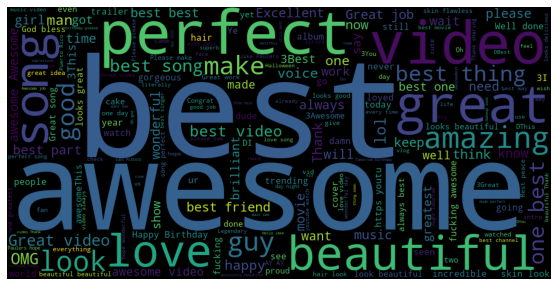

In [ ]:
plt.figure (figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**Finding negative comments**

In [ ]:
comments_negative = comments[comments['polarity']== -1]

In [ ]:
Negative_comments = ''.join(comments_negative['comment_text'])
print(Negative_comments)

boring0:22   **laughs at terrible pun**this is the worst thing i've heard. ever.People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect.Thats insane.How is this trending ? AwfulButthurt Sean, idiot!Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!!Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everythingPlease let this die, you can tell the actors are miserable.can't wait :'(Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nastyHandmaids Tale was boring, I foundI won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic!all the products are horriblejim carrey lost it, became a boring socialist hippyWinner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons.Terrible, at times like this we need to come together not stealYour style is 

In [ ]:
wordcloud = WordCloud(width= 1000,height = 500,stopwords= stopwords).generate(Negative_comments)

**Wordcloud of negative words**

(-0.5, 999.5, 499.5, -0.5)

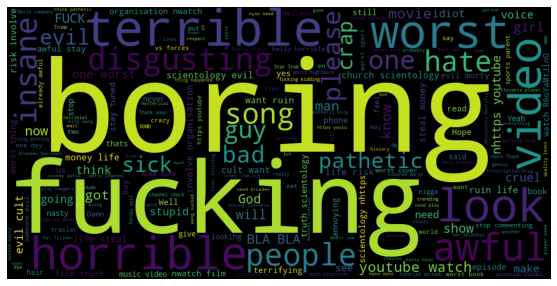

In [ ]:
plt.figure (figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**Importing testing dataset**

In [ ]:
videos = pd.read_csv('/content/gdrive/My Drive/UScomments.csv',error_bad_lines = False)
videos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
videos.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [ ]:
videos.dropna(inplace=True)

In [ ]:
videos.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [ ]:
polarity1 = []
for i in videos ['comment_text']:
    polarity1.append(TextBlob(i).sentiment.polarity)

In [ ]:
videos['polarity']=polarity1

In [ ]:
videos.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [ ]:
ascribes1=[]
for i in videos['polarity']:
  if i==0:
    ascribes1.append("Neutral")
  elif i<0:
    ascribes1.append("Negative")
  else:
    ascribes1.append("Positive")

In [ ]:
videos['Ascribes']=ascribes1

In [ ]:
videos.head(20)

,video_id,comment_text,likes,replies,polarity,Ascribes
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000,Neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000,Neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000,Neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000,Neutral
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000,Neutral
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000,Neutral
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000,Neutral
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000,Neutral
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000,Positive
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714,Negative


In [ ]:
comment1=[]
for i in videos['comment_text']:
  comment1.append(i)

**Creating testing dataset**

In [ ]:
traintest=[]
for i in range(0,len(comment1)):
  data1=[]
  data1.append(comment1[i])
  data1.append(ascribes1[i])
  traintest.append(tuple(data1))

**Calculating accuracy**

In [ ]:
print (clasfier.accuracy(traintest)) 
clasfier.show_informative_features(5)

0.875
Most Informative Features
          contains(love) = True           Positi : Neutra =    195.0 : 1.0
          contains(shit) = True           Negati : Neutra =     88.3 : 1.0
          contains(fuck) = True           Negati : Neutra =     76.6 : 1.0
          contains(good) = True           Positi : Neutra =     72.5 : 1.0
          contains(more) = True           Positi : Neutra =     69.7 : 1.0
